You can get the dataset [here](https://www.kaggle.com/uciml/iris)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

dataset = pd.read_csv('Iris.csv')
dataset = dataset.iloc[:, 1:]

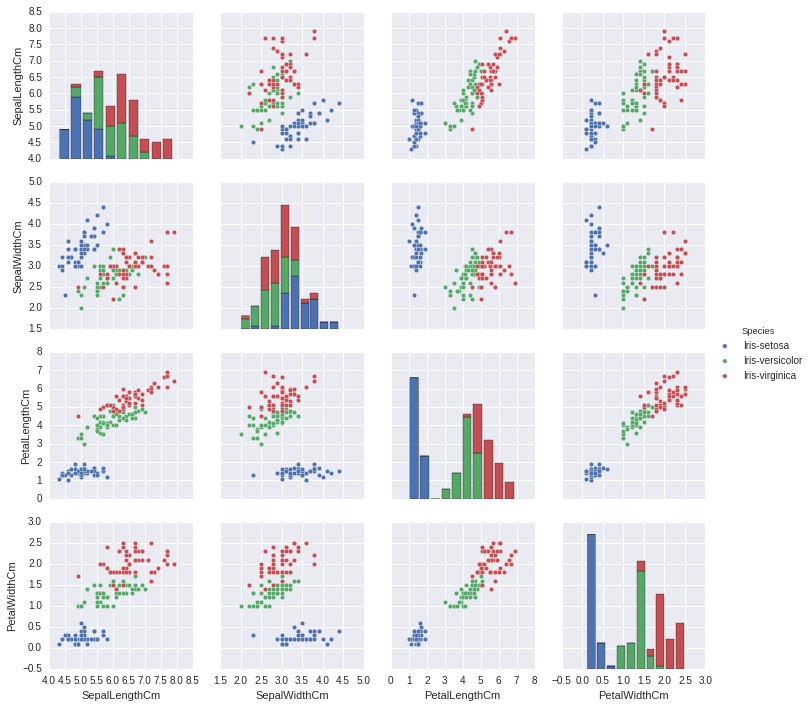

In [2]:
sns.pairplot(dataset, hue = "Species")
plt.show()

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

x_data = dataset.iloc[:, :-1].values.astype(np.float32)
y_datalabel = dataset.iloc[:, -1]
y_data = LabelEncoder().fit_transform(dataset.iloc[:, -1])

onehot = np.zeros((y_data.shape[0], np.unique(y_data).shape[0]))
for i in xrange(y_data.shape[0]):
    onehot[i, y_data[i]] = 1.0
    
x_train, x_test, y_train, y_test, _, y_test_label = train_test_split(x_data, onehot, y_data, test_size = 0.2)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
print np.unique(y_datalabel)
print np.unique(y_data)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [5]:
size_layer = 64
learning_rate = 0.01

X = tf.placeholder("float", [None, x_train.shape[1]])
Y = tf.placeholder("float", [None, np.unique(y_data).shape[0]])
layer1 = tf.Variable(tf.random_normal([x_train.shape[1], size_layer]))
layer2 = tf.Variable(tf.random_normal([size_layer, size_layer]))
layer3 = tf.Variable(tf.random_normal([size_layer, np.unique(y_data).shape[0]]))

bias1 = tf.Variable(tf.random_normal([size_layer], stddev = 0.1))
bias2 = tf.Variable(tf.random_normal([size_layer], stddev = 0.1))
bias3 = tf.Variable(tf.random_normal([np.unique(y_data).shape[0]], stddev = 0.1))

hidden1 = tf.nn.sigmoid(tf.matmul(X, layer1) + bias1)
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, layer2) + bias2)
hidden3 = tf.matmul(hidden2, layer3) + bias3

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = hidden3))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

correct_pred = tf.equal(tf.argmax(hidden3, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

BATCH_SIZE = 16

EPOCH, LOSS, ACC = [], [], []
for i in xrange(500):
    last = time.time()
    EPOCH.append(i)
    TOTAL_LOSS, ACCURACY = 0, 0
    for n in xrange(0, (x_train.shape[0] // BATCH_SIZE) * BATCH_SIZE, BATCH_SIZE):
        cost, _ = sess.run([loss, optimizer], feed_dict = {X : x_train[n: n + BATCH_SIZE, :], Y : y_train[n: n + BATCH_SIZE, :]})
        ACCURACY += sess.run(accuracy, feed_dict = {X : x_train[n: n + BATCH_SIZE, :], Y : y_train[n: n + BATCH_SIZE, :]})
        TOTAL_LOSS += cost
    
    TOTAL_LOSS /= (x_train.shape[0] // BATCH_SIZE)
    ACCURACY /= (x_train.shape[0] // BATCH_SIZE)
    LOSS.append(TOTAL_LOSS); ACC.append(ACCURACY)
    timetaken = (time.time() - last) / ((x_train.shape[0] // BATCH_SIZE) * 1.0)
    if (i + 1) % 50 == 0:
        print 'epoch: ' + str(i + 1) + ', loss: ' + str(TOTAL_LOSS) + ', accuracy: ' + str(ACCURACY) + ', s / batch: ' + str(timetaken)

epoch: 50, loss: 0.0536492699414, accuracy: 0.973214285714, s / batch: 0.000709124973842
epoch: 100, loss: 0.0247180011736, accuracy: 1.0, s / batch: 0.0007301398686
epoch: 150, loss: 0.0318160540342, accuracy: 0.991071428571, s / batch: 0.000714131764003
epoch: 200, loss: 0.00752331708801, accuracy: 1.0, s / batch: 0.00073630469186
epoch: 250, loss: 0.00402463342237, accuracy: 1.0, s / batch: 0.000724996839251
epoch: 300, loss: 0.0196749500485, accuracy: 1.0, s / batch: 0.000851290566581
epoch: 350, loss: 0.00304545859584, accuracy: 1.0, s / batch: 0.000749008996146
epoch: 400, loss: 0.00114193335737, accuracy: 1.0, s / batch: 0.000702278954642
epoch: 450, loss: 0.000744909532354, accuracy: 1.0, s / batch: 0.000714302062988
epoch: 500, loss: 0.000398376721949, accuracy: 1.0, s / batch: 0.000722714832851


In [8]:
from sklearn import metrics
testing_acc, logits = sess.run([accuracy, tf.cast(tf.argmax(hidden3, 1), tf.int32)], feed_dict = {X : x_test, Y : y_test})
print 'testing accuracy: ' + str(testing_acc)
print(metrics.classification_report(y_test_label, logits, target_names = np.unique(y_datalabel)))

testing accuracy: 0.966667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.88      1.00      0.93         7

    avg / total       0.97      0.97      0.97        30



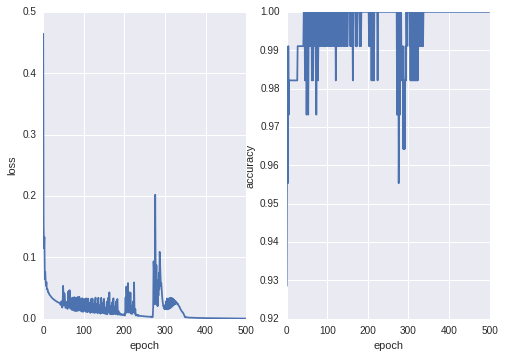

In [10]:
plt.subplot(1, 2, 1)
plt.plot(EPOCH, LOSS)
plt.xlabel('epoch'); plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(EPOCH, ACC)
plt.xlabel('epoch'); plt.ylabel('accuracy')
plt.show()